In [1]:
#Libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from pandas.io.json import json_normalize
import pickle
import os 
import sys
from IPython.core.pylabtools import figsize

# Datos históricos

In [2]:
pathAPI = os.getcwd()
pathData = os.path.join(pathAPI,'data')

# API URL Compound, https://compound.finance/docs/api#MarketHistoryService
urlcomp = 'https://api.compound.finance/api/v2/market_history/graph'

#Assets
cETH = '0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5'
cSAI = '0xf5dce57282a584d2746faf1593d3121fcac444dc'
cDAI = '0x5d3a536e4d6dbd6114cc1ead35777bab948e3643'
cUSDC = '0x39aa39c021dfbae8fac545936693ac917d5e7563'
cBAT = '0x6c8c6b02e7b2be14d4fa6022dfd6d75921d90e4e'
cUSDT = '0xf650c3d88d12db855b8bf7d11be6c55a4e07dcc9'
cBTC = '0xc11b1268c1a384e55c48c2391d8d480264a3a7f4'

#Time Frame
startT='19-10-01 00:00:00'
endT='21-03-30 00:00:00'
startT=datetime.strptime(startT, '%y-%m-%d %H:%M:%S')
endT=datetime.strptime(endT, '%y-%m-%d %H:%M:%S')

#To Unix time stamp
UstartT=datetime.timestamp(startT)
UendT=datetime.timestamp(endT)

#Frequency Dayly data
freqD=abs((endT - startT).days)

params = {"asset": cETH,
 "min_block_timestamp": int(UstartT),
 "max_block_timestamp": int(UendT),
 "num_buckets": freqD}

params

{'asset': '0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5',
 'min_block_timestamp': 1569906000,
 'max_block_timestamp': 1617080400,
 'num_buckets': 546}

In [3]:
response = requests.get(urlcomp,params)
cethHD = response.json()

#Save Data
# f = open(os.path.join(pathData,'cETH_daily.pickle'), 'wb')
# pickle.dump(cethHD, f,-1)          
# f.close()

#Load Downloaded Data
# f = open(os.path.join(pathData,'cETH_daily.pickle'), 'rb')
# cethHD = pickle.load(f)     
#  f.close()

In [4]:
cethHD.keys()

dict_keys(['asset', 'borrow_rates', 'error', 'exchange_rates', 'prices_usd', 'supply_rates', 'total_borrows_history', 'total_supply_history'])

In [5]:
# Retrive data

# Tasas
# Borrow Rate
BorR = json_normalize(cethHD['borrow_rates'],sep="_")
BorR['rate'] = BorR['rate'].astype(float)
BorR.index = pd.to_datetime(BorR['block_timestamp'], unit='s')
BorR = BorR.rate

# Supply Rate
SupR = json_normalize(cethHD['supply_rates'],sep="_")
SupR['rate'] = SupR['rate'].astype(float)
SupR.index = pd.to_datetime(SupR['block_timestamp'], unit='s')
SupR = SupR.rate

# Tasa de utilización
UtiR = pd.Series((SupR.values/(BorR.values*(1-0.3))),index=BorR.index) #Reserve Factor 20%

# Cantidades

# Total Supply
TSup = json_normalize(cethHD['total_supply_history'],sep="_")
TSup['total_value'] = TSup['total_value'].astype(float)
TSup.index = pd.to_datetime(TSup['block_timestamp'], unit='s')
TSup = TSup.total_value

# Total Borrow
TBor = json_normalize(cethHD['total_borrows_history'],sep="_")
TBor['total_value'] = TBor['total_value'].astype(float)
TBor.index = pd.to_datetime(TBor['block_timestamp'], unit='s')
TBor = TBor.total_value

# Otros

# ExchangeRate
Xrate = json_normalize(cethHD['exchange_rates'],sep="_")
Xrate['rate'] = Xrate['rate'].astype(float)
Xrate.index = pd.to_datetime(Xrate['block_timestamp'], unit='s')
Xrate = Xrate.rate

# Precio
PUSD = json_normalize(cethHD['prices_usd'],sep="_")
PUSD['price_value'] = PUSD['price_value'].astype(float)
PUSD.index = pd.to_datetime(PUSD['block_timestamp'], unit='s')
PUSD = PUSD.price_value

<ipython-input-5-d1821c2af7fd>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  BorR = json_normalize(cethHD['borrow_rates'],sep="_")
<ipython-input-5-d1821c2af7fd>:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  SupR = json_normalize(cethHD['supply_rates'],sep="_")
<ipython-input-5-d1821c2af7fd>:22: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  TSup = json_normalize(cethHD['total_supply_history'],sep="_")
<ipython-input-5-d1821c2af7fd>:28: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  TBor = json_normalize(cethHD['total_borrows_history'],sep="_")
<ipython-input-5-d1821c2af7fd>:36: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  Xrate = json_normalize(cethHD['exchange_rates'],sep="_")
<ipython-input-5-d1821c2af7fd>:42: FutureWarning: pandas

In [6]:
#To Unix time stamp
UstartT=datetime.timestamp(startT)
UendT=datetime.timestamp(endT)

#Frequency Dayly data
freqD=abs((endT - startT).days)

params = {"asset": cDAI,
 "min_block_timestamp": int(UstartT),
 "max_block_timestamp": int(UendT),
 "num_buckets": freqD}

response = requests.get(urlcomp,params)
cdaiHD = response.json()

cdaiHD.keys()

dict_keys(['asset', 'borrow_rates', 'error', 'exchange_rates', 'prices_usd', 'supply_rates', 'total_borrows_history', 'total_supply_history'])

In [7]:
# Retrive data

# Tasas
# Borrow Rate
BorRD = json_normalize(cdaiHD['borrow_rates'],sep="_")
BorRD['rate'] = BorRD['rate'].astype(float)
BorRD.index = pd.to_datetime(BorRD['block_timestamp'], unit='s')
BorRD = BorRD.rate

# Supply Rate
SupRD = json_normalize(cdaiHD['supply_rates'],sep="_")
SupRD['rate'] = SupRD['rate'].astype(float)
SupRD.index = pd.to_datetime(SupRD['block_timestamp'], unit='s')
SupRD = SupRD.rate

# Tasa de utilización
UtiRD = pd.Series((SupRD.values/(BorRD.values*(1-0.2))),index=BorRD.index) #Reserve Factor 20%

# Cantidades

# Total Supply
TSupD = json_normalize(cdaiHD['total_supply_history'],sep="_")
TSupD['total_value'] = TSupD['total_value'].astype(float)
TSupD.index = pd.to_datetime(TSupD['block_timestamp'], unit='s')
TSupD = TSupD.total_value

# Total Borrow
TBorD = json_normalize(cdaiHD['total_borrows_history'],sep="_")
TBorD['total_value'] = TBorD['total_value'].astype(float)
TBorD.index = pd.to_datetime(TBorD['block_timestamp'], unit='s')
TBorD = TBorD.total_value

# Otros

# ExchangeRate
XrateD = json_normalize(cdaiHD['exchange_rates'],sep="_")
XrateD['rate'] = XrateD['rate'].astype(float)
XrateD.index = pd.to_datetime(XrateD['block_timestamp'], unit='s')
XrateD = XrateD.rate

# Precio
PUSDD = json_normalize(cdaiHD['prices_usd'],sep="_")
PUSDD['price_value'] = PUSDD['price_value'].astype(float)
PUSDD.index = pd.to_datetime(PUSDD['block_timestamp'], unit='s')
PUSDD = PUSDD.price_value

<ipython-input-7-47239a6bd394>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  BorRD = json_normalize(cdaiHD['borrow_rates'],sep="_")
<ipython-input-7-47239a6bd394>:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  SupRD = json_normalize(cdaiHD['supply_rates'],sep="_")
<ipython-input-7-47239a6bd394>:22: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  TSupD = json_normalize(cdaiHD['total_supply_history'],sep="_")
<ipython-input-7-47239a6bd394>:28: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  TBorD = json_normalize(cdaiHD['total_borrows_history'],sep="_")
<ipython-input-7-47239a6bd394>:36: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  XrateD = json_normalize(cdaiHD['exchange_rates'],sep="_")
<ipython-input-7-47239a6bd394>:42: FutureWarning: p

In [8]:
#To Unix time stamp
UstartT=datetime.timestamp(startT)
UendT=datetime.timestamp(endT)

#Frequency Dayly data
freqD=abs((endT - startT).days)

params = {"asset": cUSDT,
 "min_block_timestamp": int(UstartT),
 "max_block_timestamp": int(UendT),
 "num_buckets": freqD}

response = requests.get(urlcomp,params)
cusdtHD = response.json()

cusdtHD.keys()

dict_keys(['asset', 'borrow_rates', 'error', 'exchange_rates', 'prices_usd', 'supply_rates', 'total_borrows_history', 'total_supply_history'])

In [9]:
# Retrive data

# Tasas
# Borrow Rate
BorRU = json_normalize(cusdtHD['borrow_rates'],sep="_")
BorRU['rate'] = BorRU['rate'].astype(float)
BorRU.index = pd.to_datetime(BorRU['block_timestamp'], unit='s')
BorRU = BorRU.rate

# Supply Rate
SupRU = json_normalize(cusdtHD['supply_rates'],sep="_")
SupRU['rate'] = SupRU['rate'].astype(float)
SupRU.index = pd.to_datetime(SupRU['block_timestamp'], unit='s')
SupRU = SupRU.rate

# Tasa de utilización
UtiRU = pd.Series((SupRU.values/(BorRU.values*(1-0.2))),index=BorRU.index) #Reserve Factor 20%

# Cantidades

# Total Supply
TSupU = json_normalize(cusdtHD['total_supply_history'],sep="_")
TSupU['total_value'] = TSupU['total_value'].astype(float)
TSupU.index = pd.to_datetime(TSupU['block_timestamp'], unit='s')
TSupU = TSupU.total_value

# Total Borrow
TBorU = json_normalize(cusdtHD['total_borrows_history'],sep="_")
TBorU['total_value'] = TBorU['total_value'].astype(float)
TBorU.index = pd.to_datetime(TBorU['block_timestamp'], unit='s')
TBorU = TBorU.total_value

# Otros

# ExchangeRate
XrateU = json_normalize(cusdtHD['exchange_rates'],sep="_")
XrateU['rate'] = XrateU['rate'].astype(float)
XrateU.index = pd.to_datetime(XrateU['block_timestamp'], unit='s')
XrateU = XrateU.rate

# Precio
PUSDU = json_normalize(cusdtHD['prices_usd'],sep="_")
PUSDU['price_value'] = PUSDU['price_value'].astype(float)
PUSDU.index = pd.to_datetime(PUSDU['block_timestamp'], unit='s')
PUSDU = PUSDU.price_value

<ipython-input-9-d3a6df7522dc>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  BorRU = json_normalize(cusdtHD['borrow_rates'],sep="_")
<ipython-input-9-d3a6df7522dc>:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  SupRU = json_normalize(cusdtHD['supply_rates'],sep="_")
<ipython-input-9-d3a6df7522dc>:22: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  TSupU = json_normalize(cusdtHD['total_supply_history'],sep="_")
<ipython-input-9-d3a6df7522dc>:28: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  TBorU = json_normalize(cusdtHD['total_borrows_history'],sep="_")
<ipython-input-9-d3a6df7522dc>:36: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  XrateU = json_normalize(cusdtHD['exchange_rates'],sep="_")
<ipython-input-9-d3a6df7522dc>:42: FutureWarni

# Lectura de métricas y simulación de espacio entre bloques

In [46]:
variosMercados = False
markets = 3
volM = 10 # 22  # Parámetro de escala 
contractor = 0.00001  # Parámetro de lectura

# Modelo Hurricane
# Parámetros
rfCompound = 0.3
baseRateBorrow = 0.08; slopeBorrow = 0.04
baseRareSupply = 0.05; slopeSupply = 0.02

if variosMercados == True:
    # Datos
    br=list(cethHD["borrow_rates"]); brd=list(cdaiHD["borrow_rates"]); bru=list(cusdtHD["borrow_rates"])
    sr=list(cethHD["supply_rates"]); srd=list(cdaiHD["supply_rates"]); sru=list(cusdtHD["supply_rates"])
    er=list(cethHD["exchange_rates"]); erd=list(cdaiHD["exchange_rates"]); eru=list(cusdtHD["exchange_rates"])
    pr=list(cethHD["prices_usd"]); prd=list(cdaiHD["prices_usd"]); pru=list(cusdtHD["prices_usd"])
    tb=list(cethHD["total_borrows_history"]); tbd=list(cdaiHD["total_borrows_history"]); tbu=list(cusdtHD["total_borrows_history"])
    ts=list(cethHD["total_supply_history"]); tsd=list(cdaiHD["total_supply_history"]); tsu=list(cusdtHD["total_supply_history"])

    lenData = min(len(ts),len(tsd),len(tsu))

    # A listas
    BR = []; BRD = []; BRU = []
    SR = []; SRD = []; SRU = []
    BL = []; BLD = []; BLU = []
    ER = []; ERD = []; ERU = []
    PR = []; PRD = []; PRU = []
    TB = []; TBD = []; TBU = []
    TS = []; TSD = []; TSU = []

    for i in range(lenData):
        BR.append(br[i]["rate"]); BRD.append(brd[i]["rate"]); BRU.append(bru[i]["rate"])
        SR.append(sr[i]["rate"]); SRD.append(srd[i]["rate"]); SRU.append(sru[i]["rate"])
        BL.append(br[i]["block_number"]); BLD.append(brd[i]["block_number"]); BLU.append(bru[i]["block_number"])
        ER.append(er[i]["rate"]); ERD.append(erd[i]["rate"]); ERU.append(eru[i]["rate"])
        PR.append(float(pr[i]["price"]["value"])); PRD.append(float(prd[i]["price"]["value"])); PRU.append(float(pru[i]["price"]["value"]))
        TB.append(float(tb[i]["total"]["value"])); TBD.append(float(tbd[i]["total"]["value"])); TBU.append(float(tbu[i]["total"]["value"]))
        TS.append(float(ts[i]["total"]["value"])); TSD.append(float(tsd[i]["total"]["value"])); TSU.append(float(tsu[i]["total"]["value"]))

    # Estimaciones
    blocksPerYear = 2*60*24*365
    RF = 0.2

    # Tasa de utilización estimada a partir de las tasas reportadas
    UT = []; UTD = []; UTU = []
    for r in range(lenData):
        UT.append(SR[r]/(BR[r]*(1-0.2)))
        UTD.append(SRD[r]/(BRD[r]*(1-0.2)))
        UTD.append(SRU[r]/(BRU[r]*(1-0.2)))

    # Tasa de utilización estimada a partir de las cantidades en TB y TS
    EUT = []; EUTD = []; EUTU = []
    for v in range(lenData):
        if TB[v] != 0:
            EUT.append(TB[v]/(TS[v]*ER[v]))
        else:
            EUT.append(0)
        if TBD[v] != 0:
            EUTD.append(TBD[v]/(TSD[v]*ERD[v]))
        else:
            EUTD.append(0)
        if TBU[v] != 0:
            EUTU.append(TBU[v]/(TSU[v]*ERU[v]))
        else:
            EUTU.append(0)

    # Métrica de espacio entre acciones
    blockDelta = [0]; blockDeltad = [0]; blockDeltau = [0]
    for b in range(1,lenData):
        blockDelta.append(BL[b] - BL[b-1])
        blockDeltad.append(BLD[b] - BLD[b-1])
        blockDeltau.append(BLU[b] - BLU[b-1])
else:
    # Datos
    br=list(cethHD["borrow_rates"]); brd=list(cdaiHD["borrow_rates"])
    sr=list(cethHD["supply_rates"]); srd=list(cdaiHD["supply_rates"])
    er=list(cethHD["exchange_rates"]); erd=list(cdaiHD["exchange_rates"])
    pr=list(cethHD["prices_usd"]); prd=list(cdaiHD["prices_usd"])
    tb=list(cethHD["total_borrows_history"]); tbd=list(cdaiHD["total_borrows_history"])
    ts=list(cethHD["total_supply_history"]); tsd=list(cdaiHD["total_supply_history"])
    
    lenData = min(len(ts),len(tsd))

    # A listas
    BR = []; BRD = []
    SR = []; SRD = []
    BL = []; BLD = []
    ER = []; ERD = []
    PR = []; PRD = []
    TB = []; TBD = []
    TS = []; TSD = []

    for i in range(lenData):
        BR.append(br[i]["rate"]); BRD.append(brd[i]["rate"])
        SR.append(sr[i]["rate"]); SRD.append(srd[i]["rate"])
        BL.append(br[i]["block_number"]); BLD.append(brd[i]["block_number"])
        ER.append(er[i]["rate"]); ERD.append(erd[i]["rate"])
        PR.append(float(pr[i]["price"]["value"])); PRD.append(float(prd[i]["price"]["value"]))
        TB.append(float(tb[i]["total"]["value"])); TBD.append(float(tbd[i]["total"]["value"]))
        TS.append(float(ts[i]["total"]["value"])); TSD.append(float(tsd[i]["total"]["value"]))

    # Estimaciones
    blocksPerYear = 2*60*24*365
    RF = 0.2

    # Tasa de utilización estimada a partir de las tasas reportadas
    UT = []; UTD = []; UTU = []
    for r in range(lenData):
        UT.append(SR[r]/(BR[r]*(1-0.2)))
        UTD.append(SRD[r]/(BRD[r]*(1-0.2)))
        

    # Tasa de utilización estimada a partir de las cantidades en TB y TS
    EUT = []; EUTD = []
    for v in range(lenData):
        if TB[v] != 0:
            EUT.append(TB[v]/(TS[v]*ER[v]))
        else:
            EUT.append(0)
        if TBD[v] != 0:
            EUTD.append(TBD[v]/(TSD[v]*ERD[v]))
        else:
            EUTD.append(0)    
            
    # Métrica de espacio entre acciones
    blockDelta = [0]; blockDeltad = [0]
    for b in range(1,lenData):
        blockDelta.append(BL[b] - BL[b-1])
        blockDeltad.append(BLD[b] - BLD[b-1])

# Simulación de métricas

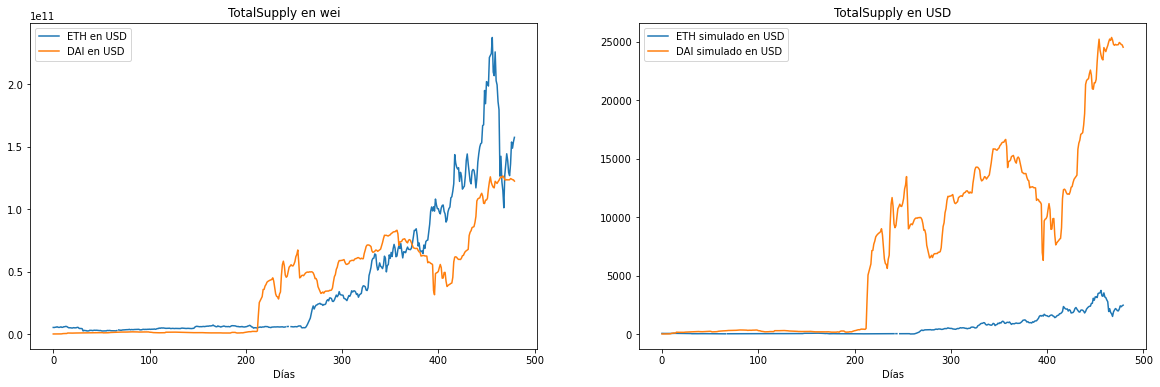

In [47]:
# PR = pd.read_csv("/home/jorge/TRU/Tropykus/tropykus-simulation/Historico de precios/ETH-USD.csv")
PR = pd.read_csv("E:/TRU/Tropykus/Simulación/tropykus-simulation/Historico de precios/ETH-USD.csv")
# PR.head()
PR = list(PR["Close"])

PR = PR[len(PR)-lenData:]

if variosMercados == True:
    TS = TS[:lenData]; TSD = TSD[:lenData]; TSU = TSU[:lenData]
    TSN = []; TSDN = []; TSUN = []
    TSmin = min(TS); TSDmin = min(TSD); TSUmin = min(TSU)

    for value in range(len(TS)):
        TSN.append((TS[value] - TSmin)*ER[value]*contractor*1/volM) # ETH
        TSDN.append((TSD[value] - TSDmin)*ER[value]*contractor) # DAI
        TSUN.append((TSU[value] - TSUmin)*ER[value]*contractor) # USDT

    # Comparación en USD

    # Valores reales tomados del API de Compound
    TSP = []; TSDP = []; TSUP = []

    for value in range(lenData):
        TSP.append(TS[value]*PR[value])
        TSDP.append(TSD[value]*PRD[value])
        TSUP.append(TSU[value]*PRU[value])

    # Valores simulados
    TSNP = []; TSDNP = []; TSUNP = []

    for value in range(lenData):
        TSNP.append(TSN[value]*PR[value])
        TSDNP.append(TSDN[value]*PRD[value])
        TSUNP.append(TSUN[value]*PRU[value])

    figsize(20,6)

    plt.subplot(1,2,1)
    plt.title("TotalSupply en wei")
    plt.plot(TSP,label = "ETH en USD")
    plt.plot(TSDP,label = "DAI en USD")
    plt.plot(TSUP,label = "USDT en USD")
    plt.xlabel("Días")
    plt.legend()

    plt.subplot(1,2,2)
    plt.title("TotalSupply en USD")
    plt.plot(TSNP,label = "ETH simulado en USD")
    plt.plot(TSDNP,label = "DAI simulado en USD")
    plt.plot(TSUNP,label = "USDT simulado en USD")
    plt.xlabel("Días")
    plt.legend()

    plt.show()
else: 
    TS = TS[:lenData]; TSD = TSD[:lenData]
    TSN = []; TSDN = []
    TSmin = min(TS); TSDmin = min(TSD)

    for value in range(len(TS)):
        TSN.append((TS[value] - TSmin)*ER[value]*contractor*1/volM) # ETH
        TSDN.append((TSD[value] - TSDmin)*ER[value]*contractor) # DAI
        
    # Comparación en USD

    # Valores reales tomados del API de Compound
    TSP = []; TSDP = []

    for value in range(lenData):
        TSP.append(TS[value]*PR[value])
        TSDP.append(TSD[value]*PRD[value])
        

    # Valores simulados
    TSNP = []; TSDNP = []

    for value in range(lenData):
        TSNP.append(TSN[value]*PR[value])
        TSDNP.append(TSDN[value]*PRD[value])
        
    figsize(20,6)

    plt.subplot(1,2,1)
    plt.title("TotalSupply en wei")
    plt.plot(TSP,label = "ETH en USD")
    plt.plot(TSDP,label = "DAI en USD")
    plt.xlabel("Días")
    plt.legend()

    plt.subplot(1,2,2)
    plt.title("TotalSupply en USD")
    plt.plot(TSNP,label = "ETH simulado en USD")
    plt.plot(TSDNP,label = "DAI simulado en USD")
    plt.xlabel("Días")
    plt.legend()

    plt.show()

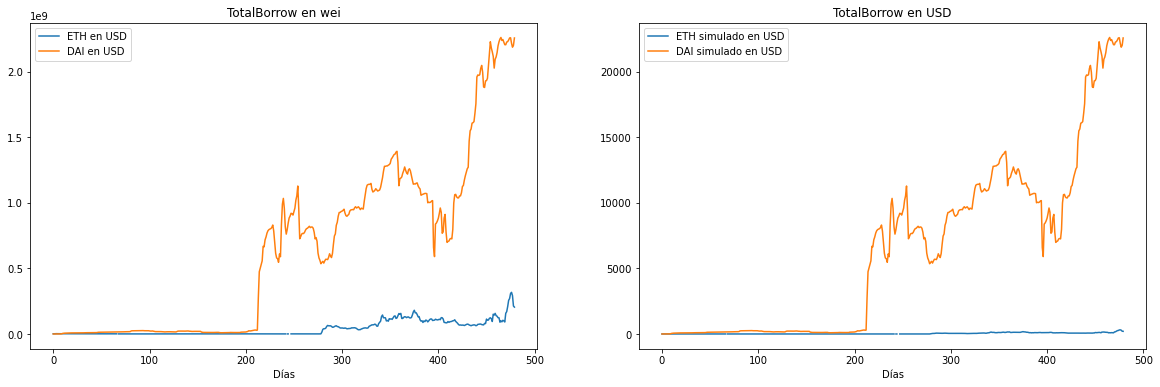

In [48]:
if variosMercados == True:
    TB = TB[:lenData]; TBD = TBD[:lenData]; TBU = TBU[:lenData]

    TBN = []; TBDN = []; TBUN = []
    TBmin = min(TB); TBDmin = min(TBD); TBUmin = min(TBU)

    for value in range(lenData):
        TBN.append((TB[value] - TBmin)*contractor*1/volM)
        TBDN.append((TBD[value] - TBDmin)*contractor)
        TBUN.append((TBU[value] - TBUmin)*contractor)

    # Comparación en USD

    # Valores reales tomados del API de Compound
    TBP = []; TBDP = []; TBUP = []

    for value in range(lenData):
        TBP.append(TB[value]*PR[value])
        TBDP.append(TBD[value]*PRD[value])
        TBUP.append(TBU[value]*PRU[value])

    # Valores simulados
    TBNP = []; TBDNP = []; TBUNP = []

    for value in range(lenData):
        TBNP.append(TBN[value]*PR[value])
        TBDNP.append(TBDN[value]*PRD[value])
        TBUNP.append(TBUN[value]*PRU[value])

    figsize(20,6)

    plt.subplot(1,2,1)
    plt.title("TotalBorrow en wei")
    plt.plot(TBP,label = "ETH en USD")
    plt.plot(TBDP,label = "DAI en USD")
    plt.plot(TBUP,label = "USDT en USD")
    plt.xlabel("Días")
    plt.legend()

    plt.subplot(1,2,2)
    plt.title("TotalBorrow en USD")
    plt.plot(TBNP,label = "ETH simulado en USD")
    plt.plot(TBDNP,label = "DAI simulado en USD")
    plt.plot(TBUNP,label = "USDT simulado en USD")
    plt.xlabel("Días")
    plt.legend()
    plt.show()
else:
    TB = TB[:lenData]; TBD = TBD[:lenData]

    TBN = []; TBDN = []
    TBmin = min(TB); TBDmin = min(TBD)

    for value in range(lenData):
        TBN.append((TB[value] - TBmin)*contractor*1/volM)
        TBDN.append((TBD[value] - TBDmin)*contractor)

    # Comparación en USD

    # Valores reales tomados del API de Compound
    TBP = []; TBDP = []

    for value in range(lenData):
        TBP.append(TB[value]*PR[value])
        TBDP.append(TBD[value]*PRD[value]) 

    # Valores simulados
    TBNP = []; TBDNP = []

    for value in range(lenData):
        TBNP.append(TBN[value]*PR[value])
        TBDNP.append(TBDN[value]*PRD[value])    

    figsize(20,6)

    plt.subplot(1,2,1)
    plt.title("TotalBorrow en wei")
    plt.plot(TBP,label = "ETH en USD")
    plt.plot(TBDP,label = "DAI en USD")
    plt.xlabel("Días")
    plt.legend()

    plt.subplot(1,2,2)
    plt.title("TotalBorrow en USD")
    plt.plot(TBNP,label = "ETH simulado en USD")
    plt.plot(TBDNP,label = "DAI simulado en USD")
    plt.xlabel("Días")
    plt.legend()
    plt.show()

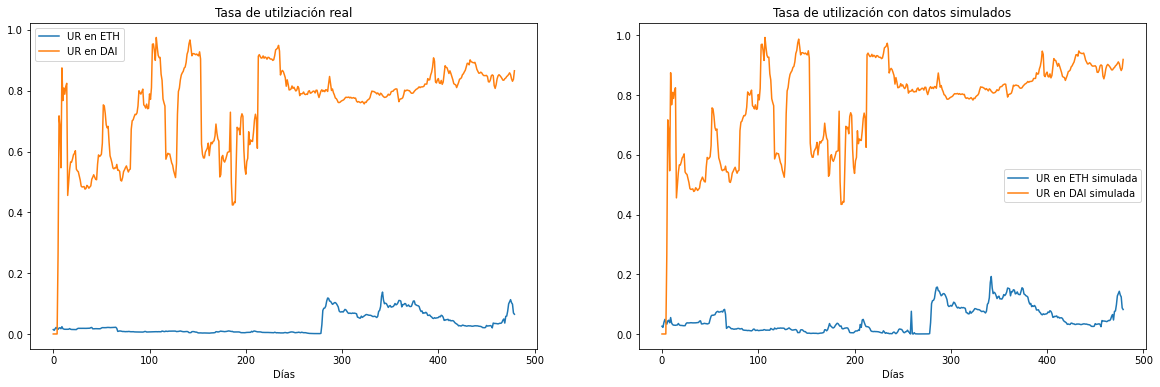

In [49]:
# Datos obtenidos de compound
if variosMercados == True:
    UTP = []; UTDP = []; UTUP = []

    for v in range(lenData):
        if TS[v] != 0:
            UTP.append(TB[v]/(TS[v]*ER[v]))
        else:
            UTP.append(0)
        if TSD[v] != 0:
            UTDP.append(TBD[v]/(TSD[v]*ERD[v]))
        else:
            UTDP.append(0)
        if TSU[v] != 0:
            UTUP.append(TBU[v]/(TSU[v]*ERU[v]))
        else:
            UTUP.append(0)

    # Utilizaciones simuladas
    UTN = []; UTDN = []; UTUN = []

    for v in range(lenData):
        if TSN[v] != 0:
            UTN.append(TBN[v]/TSN[v])
        else:
            UTN.append(0)
        if TSDN[v] != 0:
            UTDN.append(TBDN[v]/TSDN[v])
        else:
            UTDN.append(0)
        if TSUN[v] != 0:
            UTUN.append(TBUN[v]/TSUN[v])
        else:
            UTUN.append(0)

    figsize(20,6)

    plt.subplot(1,2,1)
    plt.title("Tasa de utilziación real")
    plt.plot(UTP,label="UR en ETH")
    plt.plot(UTDP, label="UR en DAI")
    plt.plot(UTUP, label="UR en USDT")
    plt.xlabel("Días")
    plt.legend()

    plt.subplot(1,2,2)
    plt.title("Tasa de utilización con datos simulados")
    plt.plot(UTN,label="UR en ETH simulada")
    plt.plot(UTDN, label="UR en DAI simulada")
    plt.plot(UTUN, label="UR en USDT simulada")
    plt.xlabel("Días")
    plt.legend()
    plt.show()
else: 
    UTP = []; UTDP = []

    for v in range(lenData):
        if TS[v] != 0:
            UTP.append(TB[v]/(TS[v]*ER[v]))
        else:
            UTP.append(0)
        if TSD[v] != 0:
            UTDP.append(TBD[v]/(TSD[v]*ERD[v]))
        else:
            UTDP.append(0)           

    # Utilizaciones simuladas
    UTN = []; UTDN = []

    for v in range(lenData):
        if TSN[v] != 0:
            UTN.append(TBN[v]/TSN[v])
        else:
            UTN.append(0)
        if TSDN[v] != 0:
            UTDN.append(TBDN[v]/TSDN[v])
        else:
            UTDN.append(0)

    figsize(20,6)

    plt.subplot(1,2,1)
    plt.title("Tasa de utilziación real")
    plt.plot(UTP,label="UR en ETH")
    plt.plot(UTDP, label="UR en DAI")  
    plt.xlabel("Días")
    plt.legend()

    plt.subplot(1,2,2)
    plt.title("Tasa de utilización con datos simulados")
    plt.plot(UTN,label="UR en ETH simulada")
    plt.plot(UTDN, label="UR en DAI simulada")
    plt.xlabel("Días")
    plt.legend()
    plt.show()

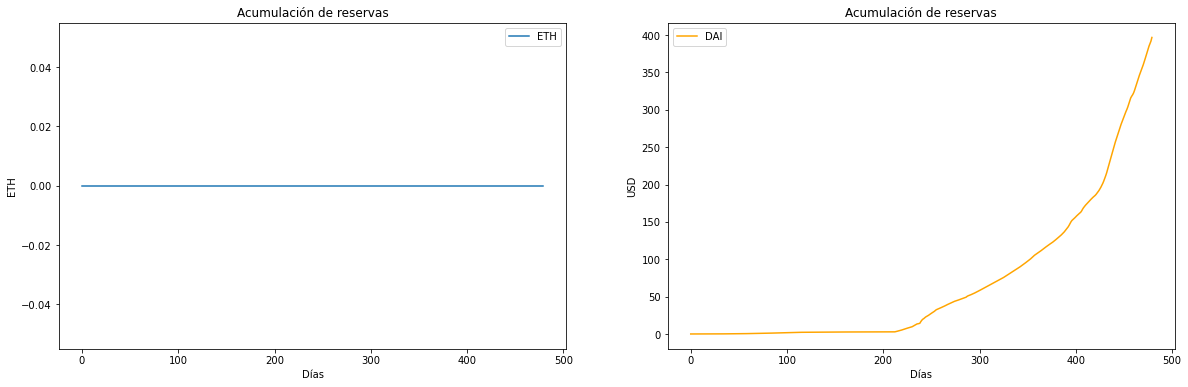

In [50]:
def tropyBR(utilizationRate):
    return utilizationRate*slopeBorrow + baseRateBorrow

def tropySR(utilizationRate):
    return utilizationRate*slopeSupply + baseRareSupply

# Tasas del modelo Hurricane
tBR = []; tSR = []
for rate in UTDN:
    tBR.append(tropyBR(rate))
    tSR.append(tropySR(rate))
    
# Reservas del modelo Hurricane
tTR = [0]
ur1 = (slopeSupply-baseRateBorrow+((baseRateBorrow-slopeSupply)**2+4*slopeBorrow*baseRareSupply)**(1/2))/(2*slopeBorrow)
ur2 = (slopeSupply-baseRateBorrow-((baseRateBorrow-slopeSupply)**2+4*slopeBorrow*baseRareSupply)**(1/2))/(2*slopeBorrow)

OUR = max(ur1,ur2)
for r in range(1,len(UTDN)):
    if UTN[r] > OUR: 
        rf = (UTN[r]*tBR[r] - tSR[r]) # ReserveFactor variable
        newTR = (tTR[r-1] + rf*TBN[r]*blockDelta[r]*tBR[r]/blocksPerYear)
    else:
        newTR = tTR[r-1]
    tTR.append(newTR)

if variosMercados == True:
    # Total de reservas estimado (Compound)
    TRD = [0]; TRU = [0]
    for a in range(1,len(TBDN)):
        newTRD = TRD[a-1] + TBDN[a]*blockDeltad[a]*BRD[a]*rfCompound/blocksPerYear
        TRD.append(newTRD)
        newTRU = TRU[a-1] + TBUN[a]*blockDeltau[a]*BRU[a]*rfCompound/blocksPerYear
        TRU.append(newTRU)

    figsize(20,6)

    plt.subplot(1,2,1)
    plt.title("Acumulación de reservas")
    plt.plot(tTR,label="ETH")
    plt.xlabel("Días")
    plt.ylabel("ETH")
    plt.legend()

    plt.subplot(1,2,2)
    plt.title("Acumulación de reservas")
    plt.plot(TRD,label="DAI",c="orange")
    plt.plot(TRU,label="USDT",c="green")
    plt.xlabel("Días")
    plt.ylabel("USD")
    plt.legend()
    plt.show()
else:
    # Total de reservas estimado (Compound)
    TRD = [0]
    for a in range(1,len(TBDN)):
        newTRD = TRD[a-1] + TBDN[a]*blockDeltad[a]*BRD[a]*rfCompound/blocksPerYear
        TRD.append(newTRD)
        
    figsize(20,6)

    plt.subplot(1,2,1)
    plt.title("Acumulación de reservas")
    plt.plot(tTR,label="ETH")
    plt.xlabel("Días")
    plt.ylabel("ETH")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.title("Acumulación de reservas")
    plt.plot(TRD,label="DAI",c="orange")
    plt.xlabel("Días")
    plt.ylabel("USD")
    plt.legend()
    plt.show()

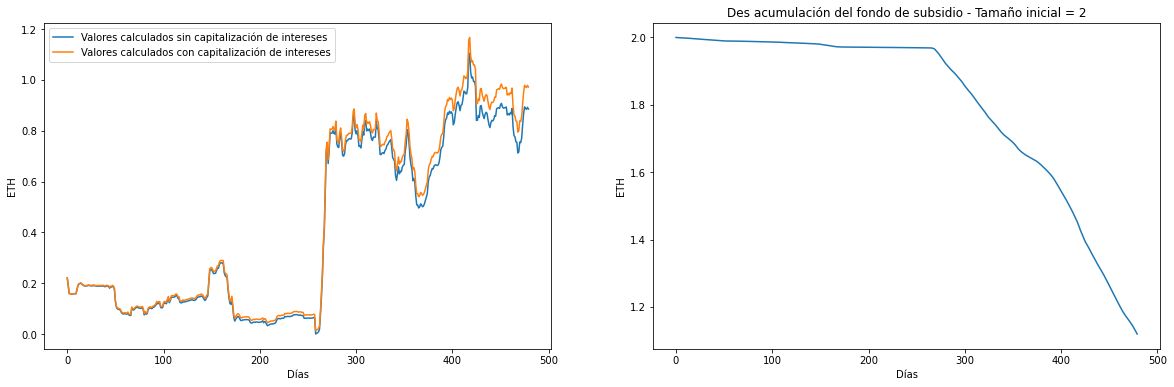

Baja de 2 a 1.1194709706658792


In [51]:
# Pagos compuestos (rendimientos para los suppliers)
TSt = [TSN[0]]

for v in range(1,len(TSN)):
    pTS = TSt[v-1]*(1+tSR[v-1]*blockDelta[v]/blocksPerYear) + (TSN[v] - TSN[v-1])
    TSt.append(pTS)

# Cash estimado
CN = [TSt[0] - TBN[0]]

for d in range(1,len(TS)):
    CN.append(CN[d-1] - (TBN[d] - TBN[d-1]) + tTR[d] + (TSt[d] - TSt[d-1]))

# Intereses prometidos
promisesN = [0]

for a in range(1,len(TS)):
    promisesN.append(CN[a-1]*TSt[a-1]*blockDelta[a]/blocksPerYear)

# Intereses generados por las deudas
interestPerBorrowsN = [0]

for a in range(1,len(TBN)):
    interestPerBorrowsN.append(TBN[a-1]*tBR[a-1]*blockDelta[a]/blocksPerYear)

# Lo que sale del fondo
subsidyN = [2] # Tamaño inicial del fondo

for a in range(1,len(promisesN)):
    subsidyN.append(subsidyN[a-1] - max(0,promisesN[a] - interestPerBorrowsN[a]))
    
figsize(20,6)    

plt.subplot(1,2,1)
plt.ylabel("ETH")
plt.plot(TSN, label="Valores calculados sin capitalización de intereses")
plt.plot(TSt, label="Valores calculados con capitalización de intereses")
plt.xlabel("Días")
plt.legend()
    
plt.subplot(1,2,2)
plt.title("Des acumulación del fondo de subsidio - Tamaño inicial = 2")
plt.plot(subsidyN)
plt.xlabel("Días")
plt.ylabel("ETH")
plt.show()

print("Baja de",subsidyN[0],"a",min(subsidyN))

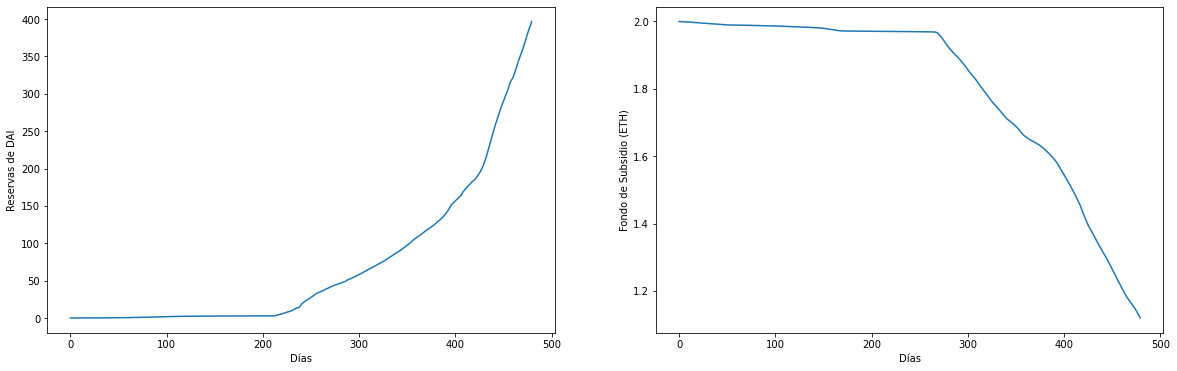

In [52]:
if variosMercados == True:
    figsize(20,4)

    plt.subplot(1,3,1)
    plt.plot(TRD)
    plt.ylabel("Reservas de DAI")
    plt.xlabel("Días")

    plt.subplot(1,3,2)
    plt.plot(TRU)
    plt.ylabel("Reservas de USDT")
    plt.xlabel("Días")

    plt.subplot(1,3,3)
    plt.plot(subsidyN)
    plt.ylabel("Fondo de Subsidio (ETH)")
    plt.xlabel("Días")

    plt.show()
else:
    figsize(20,6)

    plt.subplot(1,2,1)
    plt.plot(TRD)
    plt.ylabel("Reservas de DAI")
    plt.xlabel("Días")

    plt.subplot(1,2,2)
    plt.plot(subsidyN)
    plt.ylabel("Fondo de Subsidio (ETH)")
    plt.xlabel("Días")

    plt.show()

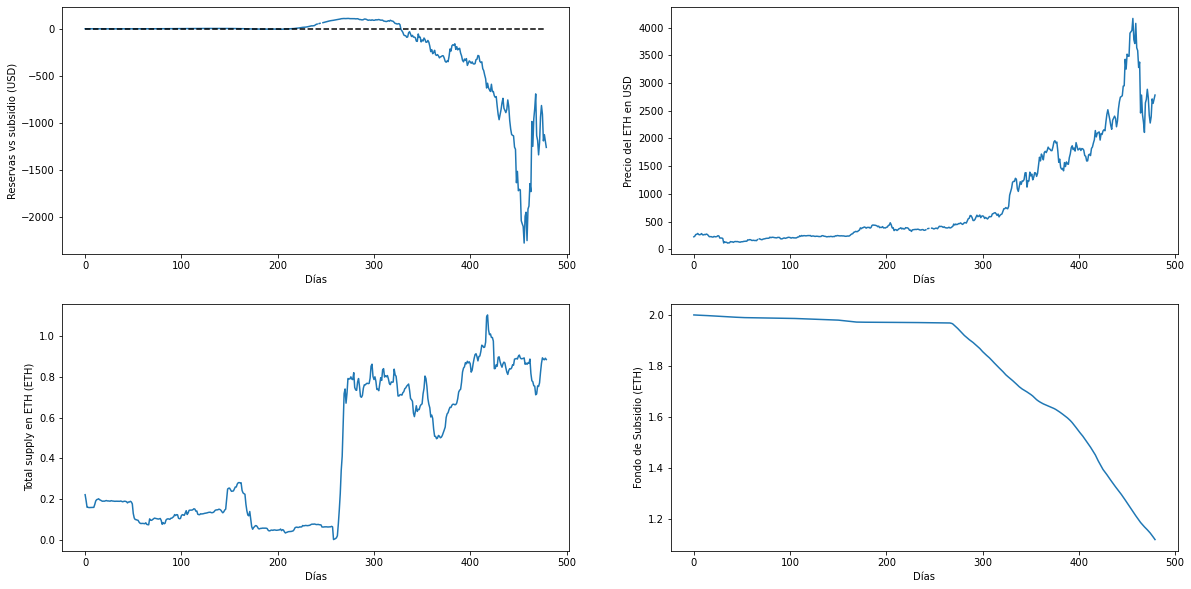

In [53]:
if variosMercados == True:
    earnings = []
    for r in range(lenData):
        earnings.append(TRD[r]*PRD[r] + TRU[r]*PRU[r] - (subsidyN[0]-subsidyN[r])*PR[r])

    figsize(20,4)

    plt.subplot(1,3,1)
    plt.plot(earnings)
    plt.ylabel("Reservas vs subsidio (USD)")
    plt.xlabel("Días")

    plt.subplot(1,3,2)
    plt.plot(PR)
    plt.ylabel("Precio del ETH en USD")
    plt.xlabel("Días")

    plt.subplot(1,3,3)
    plt.plot(TSN)
    plt.ylabel("Total supply en ETH (ETH)")
    plt.xlabel("Días")

    plt.show()
else:
    earnings = []
    for r in range(lenData):
        earnings.append(TRD[r]*PRD[r]*markets - (subsidyN[0]-subsidyN[r])*PR[r])

    figsize(20,10)

    plt.subplot(2,2,1)
    plt.plot(earnings)
    plt.plot(tTR,"k--")
    plt.ylabel("Reservas vs subsidio (USD)")
    plt.xlabel("Días")

    plt.subplot(2,2,2)
    plt.plot(PR)
    plt.ylabel("Precio del ETH en USD")
    plt.xlabel("Días")

    plt.subplot(2,2,3)
    plt.plot(TSN)
    plt.ylabel("Total supply en ETH (ETH)")
    plt.xlabel("Días")
    
    plt.subplot(2,2,4)
    plt.plot(subsidyN)
    plt.ylabel("Fondo de Subsidio (ETH)")
    plt.xlabel("Días")

    plt.show()

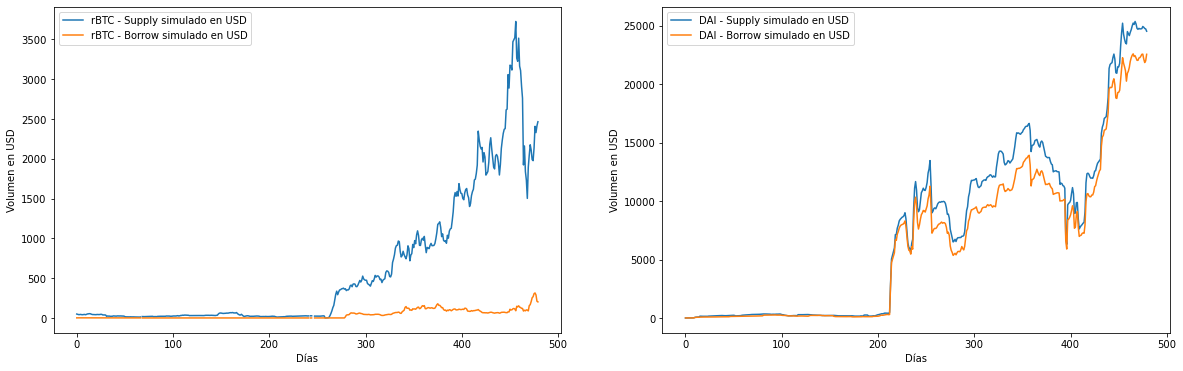

In [54]:
if variosMercados == True:
    figsize(20,6)

    plt.subplot(1,2,1)
    plt.plot(TSNP,label = "rBTC - Supply simulado en USD")
    plt.plot(TBNP,label = "rBTC - Borrow simulado en USD")
    plt.ylabel("Volumen en USD")
    plt.xlabel("Días")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(TSDNP,label = "DAI - Supply simulado en USD")
    plt.plot(TBDNP,label = "DAI - Borrow simulado en USD")
    plt.plot(TSUNP,label = "USDT simulado en USD")
    plt.plot(TBUNP,label = "USDT simulado en USD")
    plt.ylabel("Volumen en USD")
    plt.xlabel("Días")
    plt.legend()

    plt.show()
else:
    figsize(20,6)

    plt.subplot(1,2,1)
    plt.plot(TSNP,label = "rBTC - Supply simulado en USD")
    plt.plot(TBNP,label = "rBTC - Borrow simulado en USD")
    plt.ylabel("Volumen en USD")
    plt.xlabel("Días")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(TSDNP,label = "DAI - Supply simulado en USD")
    plt.plot(TBDNP,label = "DAI - Borrow simulado en USD")
    plt.ylabel("Volumen en USD")
    plt.xlabel("Días")
    plt.legend()

    plt.show()

## Paso a precios del BTC

In [55]:
# BTCPrice = pd.read_excel("/TRU/Tropykus/Simulación/tropykus-simulation/Historico de precios/Bitcoin.xlsx")

BTCPrice = pd.read_csv("/TRU/Tropykus/Simulación/tropykus-simulation/Historico de precios/BTC-USD.csv")
# BTCPrice.keys()

# BTCPrice = pd.read_csv("/home/jorge/TRU/Tropykus/tropykus-simulation/Historico de precios/BTC-USD.csv")
# BTCPrice.keys()

BTCPrice = list(BTCPrice["Close"])
BTCPrice = BTCPrice[len(BTCPrice)-lenData:]

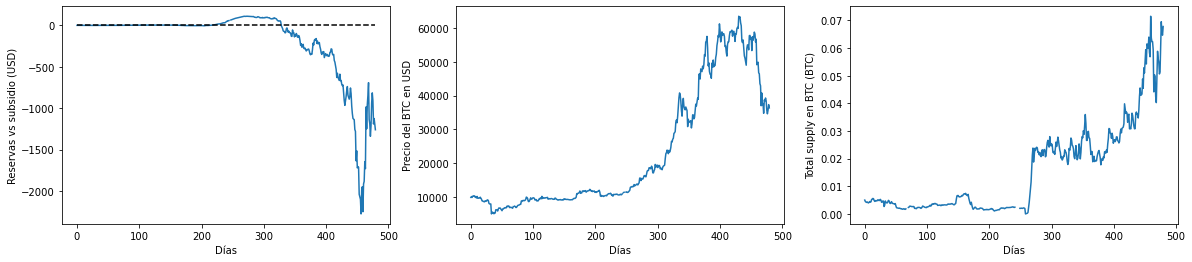

In [56]:
if variosMercados == True:
    figsize(20,4)
    earnings = []
    for r in range(lenData):
        earnings.append(TRD[r]*PRD[r] + TRU[r]*PRU[r] - (subsidyN[0]-subsidyN[r])*PR[r])

    TSNBTC = []
    for v in range(lenData):
        TSNBTC.append(TSN[v]*PR[v]/BTCPrice[v])

    figsize(20,4)

    plt.subplot(1,3,1)
    plt.plot(earnings)
    plt.ylabel("Reservas vs subsidio (USD)")
    plt.xlabel("Días")

    plt.subplot(1,3,2)
    plt.plot(BTCPrice)
    plt.ylabel("Precio del BTC en USD")
    plt.xlabel("Días")

    plt.subplot(1,3,3)
    plt.plot(TSNBTC)
    plt.ylabel("Total supply en BTC (BTC)")
    plt.xlabel("Días")

    plt.show()
else:
    figsize(20,4)
    earnings = []
    for r in range(lenData):
        earnings.append(TRD[r]*PRD[r]*markets-(subsidyN[0]-subsidyN[r])*PR[r])

    TSNBTC = []
    for v in range(lenData):
        TSNBTC.append(TSN[v]*PR[v]/BTCPrice[v])
    
    subN = []
    for v in range(lenData):
        subN.append(subsidyN[v]*PR[v]/BTCPrice[v])

    figsize(20,4)

    plt.subplot(1,3,1)
    plt.plot(earnings)
    plt.plot(tTR,"k--")
    plt.ylabel("Reservas vs subsidio (USD)")
    plt.xlabel("Días")

    plt.subplot(1,3,2)
    plt.plot(BTCPrice)
    plt.ylabel("Precio del BTC en USD")
    plt.xlabel("Días")

    plt.subplot(1,3,3)
    plt.plot(TSNBTC)
    plt.ylabel("Total supply en BTC (BTC)")
    plt.xlabel("Días")

    plt.show()

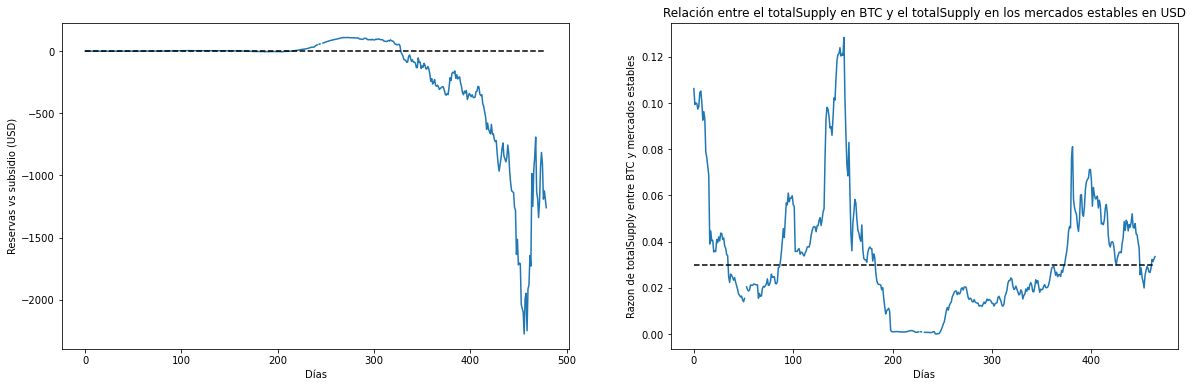

In [57]:
inc = []
lim = []

if variosMercados == True:
    for v in range(len(TSNP)):
        inc.append(TSNP[v]/((TSDNP[v]+TSUNP[v]+0.00000000000001)))
        lim.append(0.08)
else:
    for v in range(len(TSNP)):
        inc.append(TSNP[v]/((TSDNP[v]+0.00000000000001)*markets))
        lim.append(0.03)

n = 15

figsize(20,6)

plt.subplot(1,2,1)
plt.plot(earnings)
plt.plot(tTR,"k--")
plt.ylabel("Reservas vs subsidio (USD)")
plt.xlabel("Días")

plt.subplot(1,2,2)
plt.title("Relación entre el totalSupply en BTC y el totalSupply en los mercados estables en USD")
plt.plot(inc[n:])
plt.plot(lim[n:], "k--")
plt.ylabel("Razon de totalSupply entre BTC y mercados estables")
plt.xlabel("Días")
plt.show()